In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [ ]:
sns.set_style('darkgrid')

In [ ]:
sns.set(rc={'figure.figsize':(8.7,6.27)})

In [ ]:
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('Iris.csv')

In [ ]:
data.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
data['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [ ]:
rows, col = data.shape
print("Rows:%s, column: %s"% (rows, col))

Rows:150, column: 6


##Visualisation

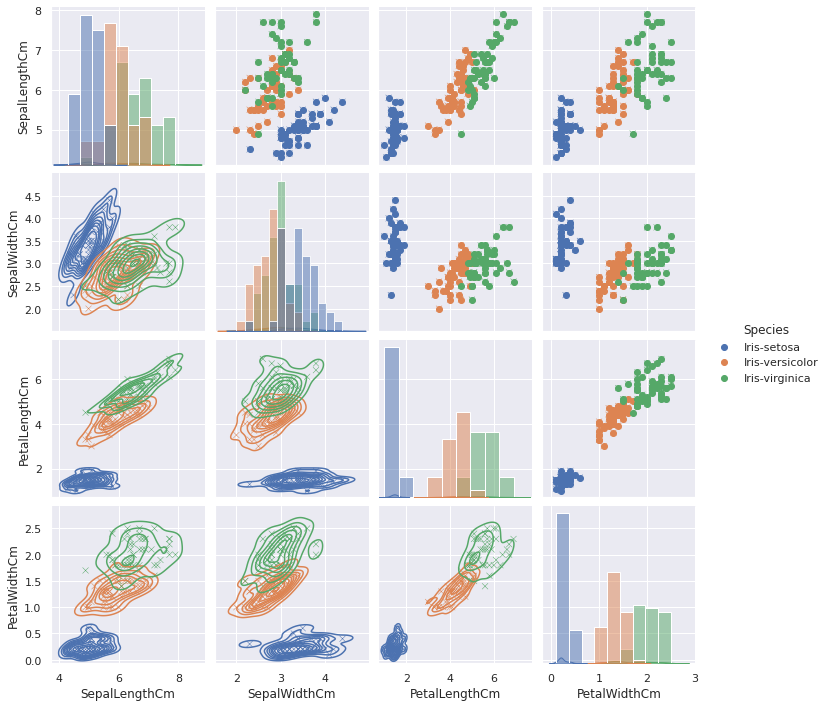

In [ ]:
snsdata = data.drop(['Id'], axis =1)
g = sns.pairplot(snsdata, hue = 'Species', markers = 'x')
g = g.map_upper(plt.scatter)
g = g.map_lower(sns.kdeplot)
g = g.map_diag(sns.histplot)

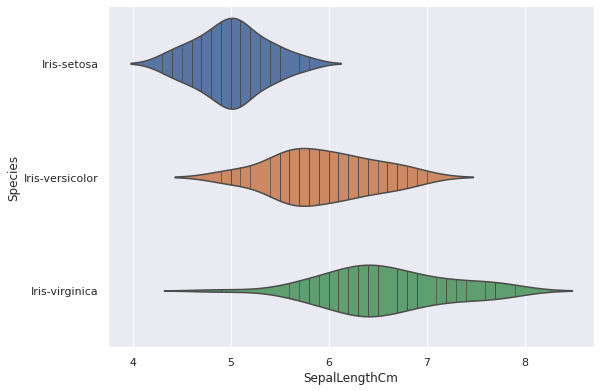

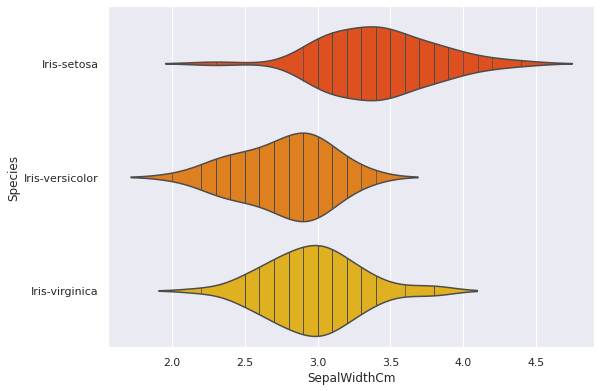

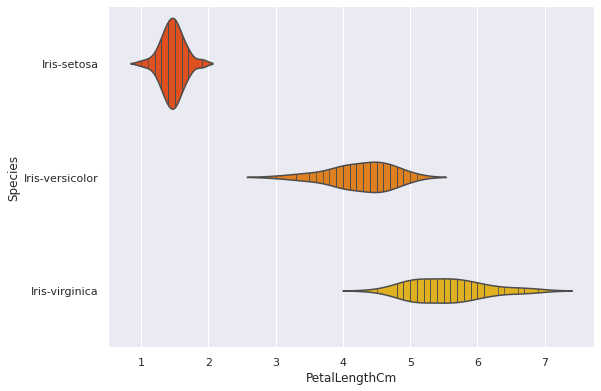

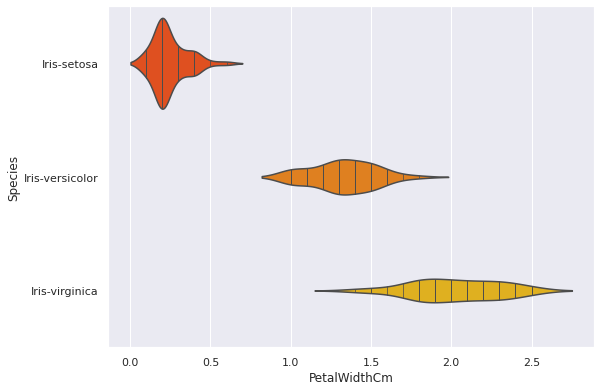

In [ ]:
sns.violinplot(x = 'SepalLengthCm', y = 'Species', data = data, inner = 'stick', pallete = 'autumn')
plt.show()
sns.violinplot(x='SepalWidthCm', y='Species', data=data, inner='stick', palette='autumn')
plt.show()
sns.violinplot(x='PetalLengthCm', y='Species', data=data, inner='stick', palette='autumn')
plt.show()
sns.violinplot(x='PetalWidthCm', y='Species', data=data, inner='stick', palette='autumn')
plt.show()

In [ ]:
mapping = {'Iris-setosa':1,
           'Iris-versicolor':2,
           'Iris-virginica':3}

X =data.drop(['Id','Species'], axis = 1).values
y = data.Species.replace(mapping).values.reshape(rows,1)
X = np.hstack(((np.ones((rows,1))), X))

In [ ]:
np.random.seed(1)
theta = np.random.randn(1,5)
print('Theta:%s'% theta)

Theta:[[ 1.62434536 -0.61175641 -0.52817175 -1.07296862  0.86540763]]


In [ ]:
iteration = 1000
learning_rate = 0.003
J = np.zeros(iteration)

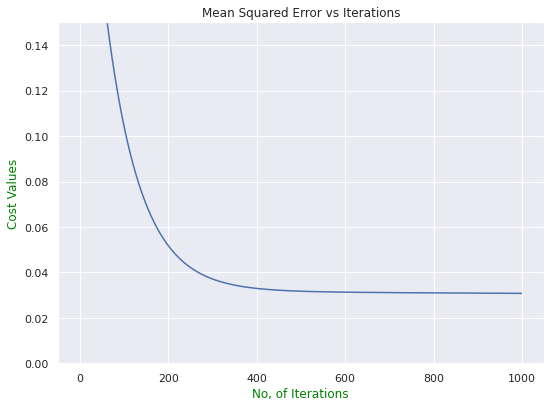

In [ ]:
for i in range(iteration):
  J[i] = (1/(2*rows)*np.sum((np.dot(X,theta.T)-y)**2))
  theta -= ((learning_rate/rows) * np.dot((np.dot(X, theta.T) - y).reshape(1,rows), X))
prediction = np.round(np.dot(X, theta.T))

ax = plt.subplot(111)
ax.plot(np.arange(iteration), J)
ax.set_ylim([0,0.15])
plt.ylabel('Cost Values', color = 'Green')
plt.xlabel('No, of Iterations', color = 'Green')
plt.title('Mean Squared Error vs Iterations')
plt.show()

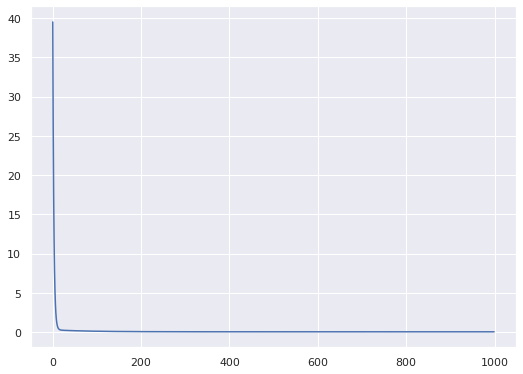

In [ ]:
ax = sns.lineplot(x=np.arange(iteration), y=J)
plt.show()

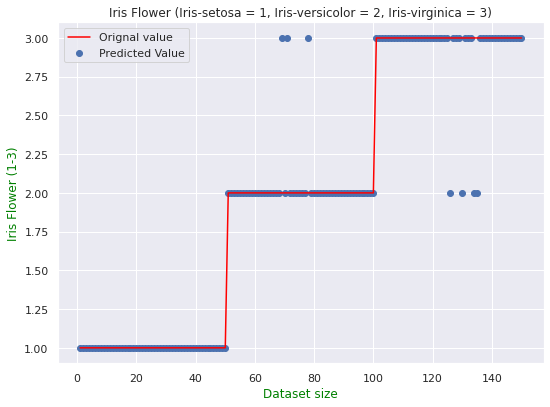

In [ ]:
ax = plt.subplot(111)

ax.plot(np.arange(1, 151, 1), y, label='Orignal value', color='red')
ax.scatter(np.arange(1, 151, 1), prediction, label='Predicted Value')

plt.xlabel("Dataset size", color="Green")
plt.ylabel("Iris Flower (1-3)", color="Green")
plt.title("Iris Flower (Iris-setosa = 1, Iris-versicolor = 2, Iris-virginica = 3)")

ax.legend()
plt.show()

In [ ]:
accuracy = (sum(prediction == y)/float(len(y)) * 100)
print("The model predicted values of Iris dataset with an overall accuracy of %s" % (accuracy))

The model predicted values of Iris dataset with an overall accuracy of [95.33333333]
